Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file and take a look at it
train = pd.read_csv('train/train.csv')

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
# Taking a look at how many rows and columns the train dataset contains
rows=len(train)
columns=len(train.columns)

print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [5]:
# Your code here
train.isna().values.any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [6]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

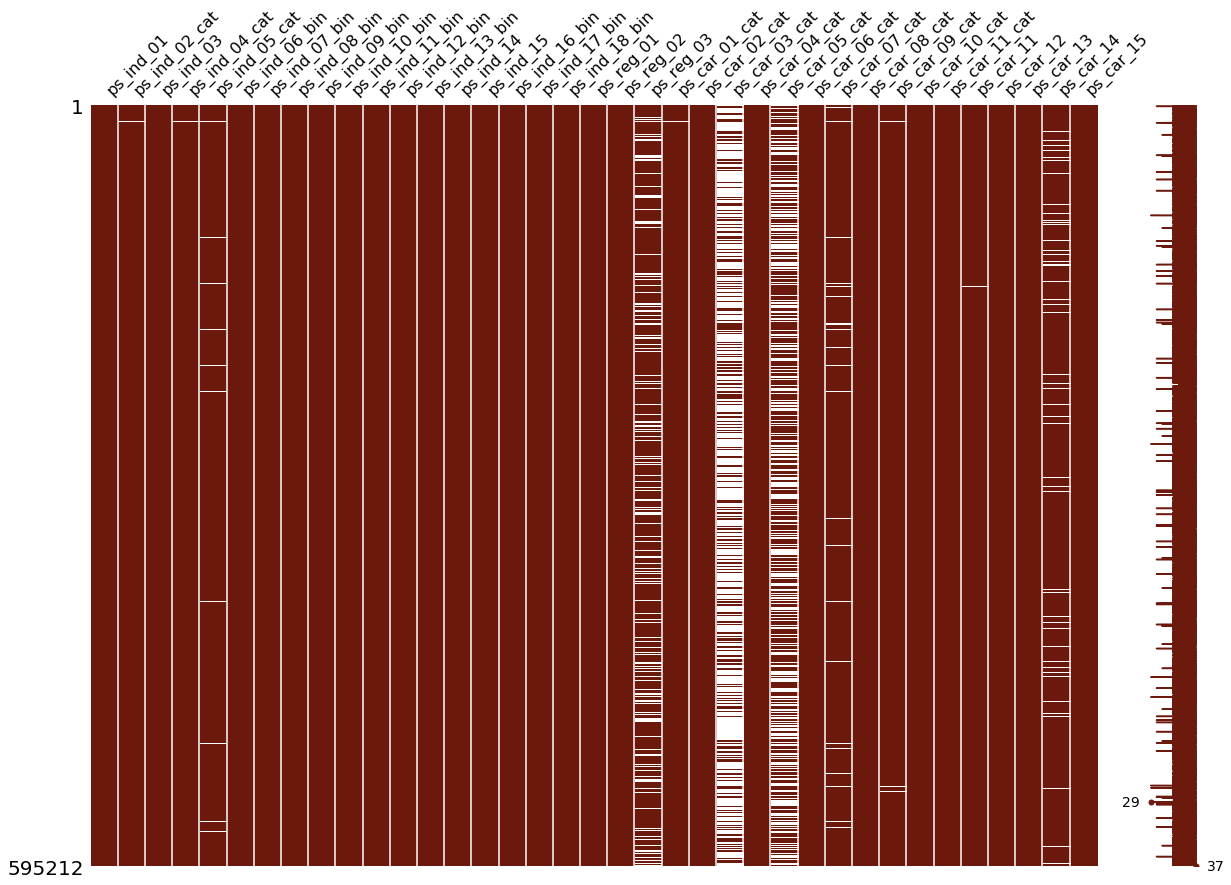

In [7]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [8]:
# List null columns name
list_null=train_copy[train_copy.columns[2:]].isna().sum(axis=0).sort_values(axis=0, ascending=True)
list_null[list_null!=0]

ps_car_12             1
ps_car_11             5
ps_car_02_cat         5
ps_ind_04_cat        83
ps_car_01_cat       107
ps_ind_02_cat       216
ps_car_09_cat       569
ps_ind_05_cat      5809
ps_car_07_cat     11489
ps_car_14         42620
ps_reg_03        107772
ps_car_05_cat    266551
ps_car_03_cat    411231
dtype: int64

#### Target variable inspection

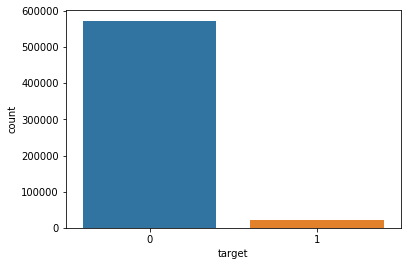

In [9]:
# Using countplot to represent target
sns.countplot(x=train_copy['target'],data=train_copy)

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [10]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

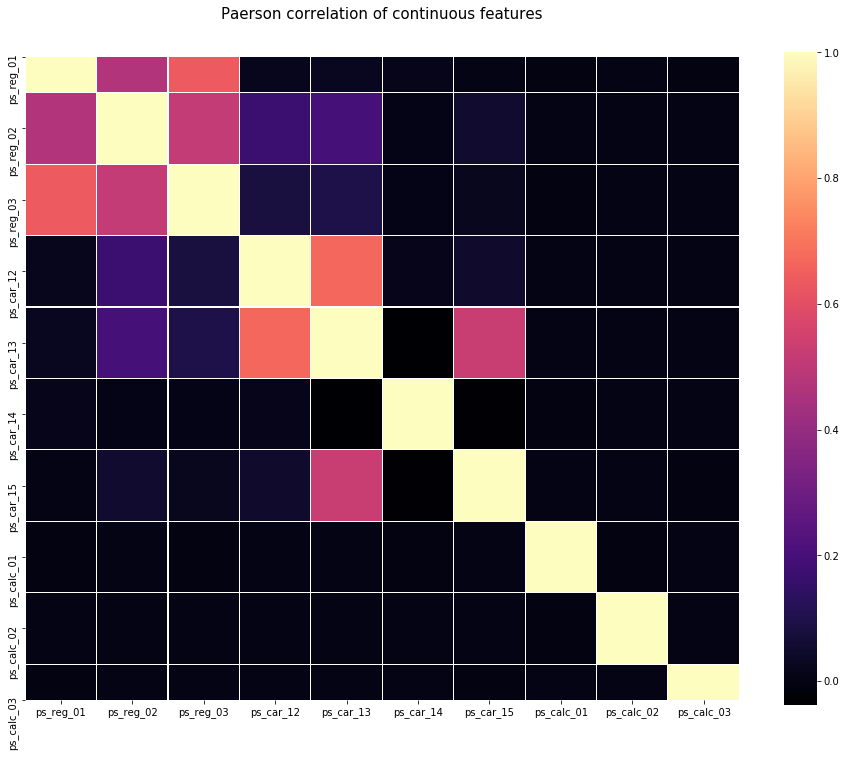

In [11]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

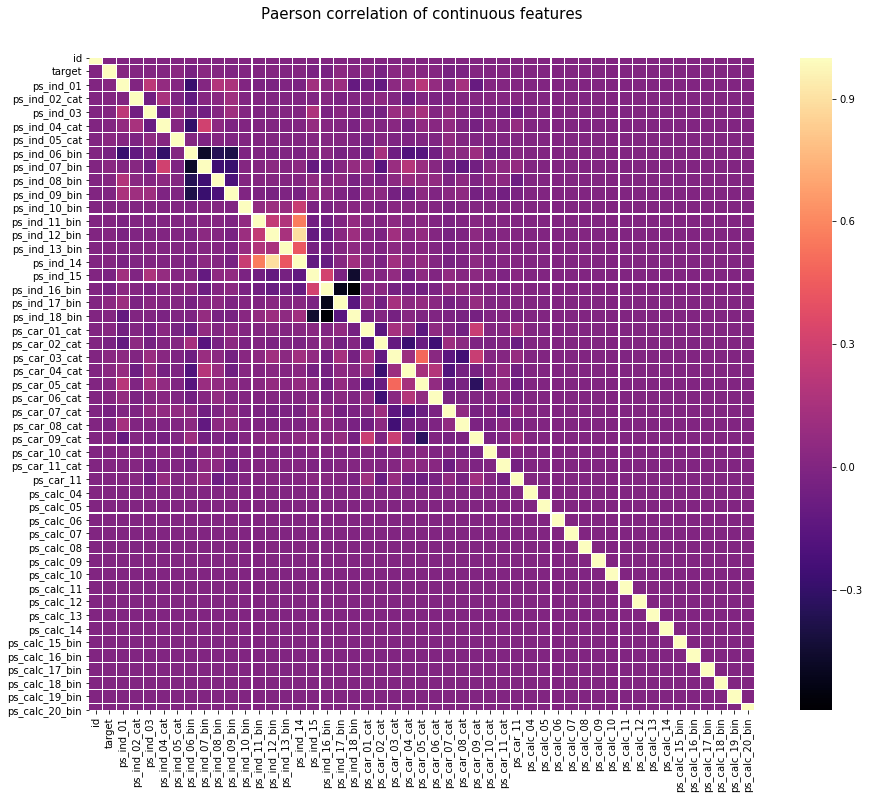

In [12]:
# Your code here
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : 

(ps_ind_06_bin,ps_ind_07_bin)

(ps_ind_06_bin,ps_ind_08_bin)

(ps_ind_06_bin,ps_ind_09_bin)

(ps_ind_07_bin,ps_ind_08_bin)

(ps_ind_07_bin,ps_ind_09_bin)

(ps_ind_08_bin,ps_ind_09_bin)

(ps_ind_18_bin,ps_ind_15)

(ps_ind_18_bin,ps_ind_16_bin)

(ps_ind_17_bin,ps_ind_16_bin)


### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [13]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [25]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


In [37]:
bin_value_counts.columns.tolist()

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

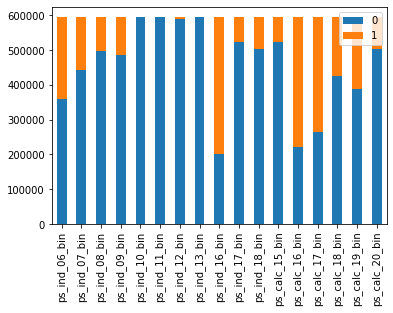

In [39]:
# hint pandas plot.bar with stacked=True
bin_value_counts.T.plot(kind='bar', stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [41]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

In [42]:
train_copy.dropna(subset=['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14'], axis=0, inplace= True)
train_copy.isnull().sum()
train_copy.shape
# Define X (features), y (target)
X = train_copy.drop('target', 1) # Your code here
y = train_copy.target# Your code here

In [43]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

Random under-sampling:
1    5670
0    5670
Name: target, dtype: int64


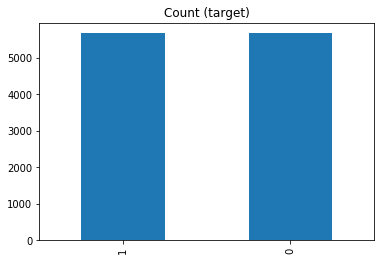

In [44]:
# Your code here
count_class_0, count_class_1 = train_copy.target.value_counts()

# Divide by class
df_class_0 = train_copy[train_copy['target'] == 0]
df_class_1 = train_copy[train_copy['target'] == 1]

df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.target.value_counts())

df_under.target.value_counts().plot(kind='bar', title='Count (target)');

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

Random over-sampling:
1    119261
0    119261
Name: target, dtype: int64


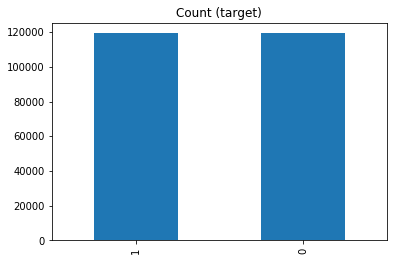

In [45]:
# Your code here
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.target.value_counts())

df_over.target.value_counts().plot(kind='bar', title='Count (target)');

## 4. Modeling

In [46]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
# Your code here
from sklearn.linear_model import LogisticRegression

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression() #Your code here
dtc = tree.DecisionTreeClassifier() #Your code here
rfc = RandomForestClassifier(n_estimators=100) #Your code here
bnb = BernoulliNB() #Your code here
gnb = GaussianNB() #Your code here

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [47]:
# Import confusion_matrix, classification_report
# Your code here
from sklearn.metrics import confusion_matrix, classification_report
# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    # Your code here
    y_pred = estimator.predict(X)
    cm = confusion_matrix(y, y_pred)
    print('Confusion matrax \n',cm)
    cr = classification_report(y, y_pred)
    print('Classification_report \n', cr)
    return 0

### Evaluate with Origin dataset

In [48]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train, y_train)
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test, y_test)
    print("=======================================")

Model: Logistic Regression
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     23821
           1       0.00      0.00      0.00      1166

    accuracy                           0.95     24987
   macro avg       0.48      0.50      0.49     24987
weighted avg       0.91      0.95      0.93     24987

Model: Decision Tree
Confusion matrax 
 [[22400  1421]
 [ 1069    97]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     23821
           1       0.06      0.08      0.07      1166

    accuracy                           0.90     24987
   macro avg       0.51      0.51      0.51     24987
weighted avg       0.91      0.90      0.91     24987

Model: Random Forest
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support



### Evaluate with *Undersampled* dataset

In [49]:
X = df_under.drop('target', 1) # Your code here
y = df_under.target# Your code here
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train, y_train)
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test, y_test)
    print("=======================================")

Model: Logistic Regression
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     23821
           1       0.00      0.00      0.00      1166

    accuracy                           0.95     24987
   macro avg       0.48      0.50      0.49     24987
weighted avg       0.91      0.95      0.93     24987

Model: Decision Tree
Confusion matrax 
 [[22414  1407]
 [ 1072    94]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     23821
           1       0.06      0.08      0.07      1166

    accuracy                           0.90     24987
   macro avg       0.51      0.51      0.51     24987
weighted avg       0.91      0.90      0.91     24987

Model: Random Forest
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support



### Evaluate with *Oversampled* dataset

In [50]:
X = df_over.drop('target', 1) # Your code here
y = df_over.target# Your code here
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train, y_train)
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test, y_test)
    print("=======================================")

Model: Logistic Regression
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     23821
           1       0.00      0.00      0.00      1166

    accuracy                           0.95     24987
   macro avg       0.48      0.50      0.49     24987
weighted avg       0.91      0.95      0.93     24987

Model: Decision Tree
Confusion matrax 
 [[22452  1369]
 [ 1068    98]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95     23821
           1       0.07      0.08      0.07      1166

    accuracy                           0.90     24987
   macro avg       0.51      0.51      0.51     24987
weighted avg       0.91      0.90      0.91     24987

Model: Random Forest
Confusion matrax 
 [[23821     0]
 [ 1166     0]]
Classification_report 
               precision    recall  f1-score   support



### Conclusion

Accuracy:

    Lowest: Decision Tree
    
    Highest: Others

Recall:
    
    Lowest: Decision Tree
    
    Highest: Others
    
F1_score:
    
    Lowest: Decistion Tree
    
    Highest: Others

## 6. GridsearchCV

In [53]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



#### which is the best combination of parameter

In [ ]:
# Your code here
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)

# Done! Great Job.